In [85]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [86]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
# dividing the dataset into dependent and independent features
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [89]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [90]:
# Feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [91]:
# concatenate these variables with dataset
X = X.drop(['Geography','Gender'], axis = 1)

In [92]:
X = pd.concat([X, geography, gender], axis = 1)

In [93]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [94]:
# splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [95]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
X_train.shape

(8000, 11)

In [97]:
# create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [98]:
# initialize ANN
classifier = Sequential()
classifier.add(Dense(units = 11, activation = 'relu'))

In [99]:
# adding first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

In [100]:
# adding second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [101]:
# adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [102]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [104]:
model_histroy = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5852 - accuracy: 0.7022 - val_loss: 0.4675 - val_accuracy: 0.7963
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4356 - accuracy: 0.8099 - val_loss: 0.4271 - val_accuracy: 0.8137
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3935 - accuracy: 0.8347 - val_loss: 0.3998 - val_accuracy: 0.8330
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8481 - val_loss: 0.3865 - val_accuracy: 0.8364
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3538 - accuracy: 0.8552 - val_loss: 0.3817 - val_accuracy: 0.8376
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3471 - accuracy: 0.8574 - val_loss: 0.3775 - val_accuracy: 0.8387
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3420 - accuracy: 0.8593 - val_loss: 0.3760 - val_accuracy:

In [105]:
model_histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

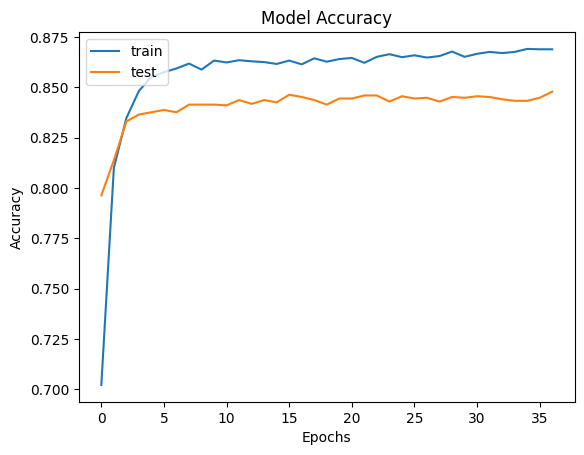

In [106]:
# summarize history of accuracy
plt.plot(model_histroy.history['accuracy'])
plt.plot(model_histroy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

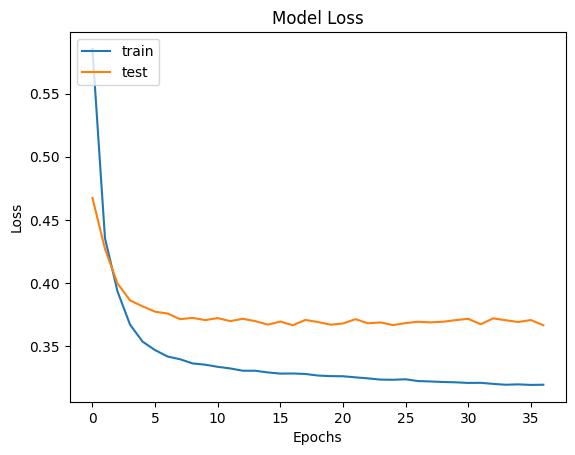

In [109]:
plt.plot(model_histroy.history['loss'])
plt.plot(model_histroy.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [110]:
# make predictions and evaluate the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [111]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1524,   71],
       [ 213,  192]])

In [113]:
# calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc


0.858

In [115]:
# get the weights
classifier.get_weights()

[array([[-3.20675038e-02,  4.39515784e-02,  1.08811222e-01,
         -2.04533455e-03, -3.25050801e-01, -5.73113095e-03,
         -1.42056823e-01,  6.44692481e-02, -1.76867023e-01,
          2.59174019e-01, -2.62890875e-01],
        [ 6.06076300e-01,  2.12792158e-01,  3.27365100e-01,
          9.97761965e-01, -4.69503909e-01, -3.29401076e-01,
         -9.22671780e-02, -3.77085991e-02,  4.59919482e-01,
          5.60178310e-02, -3.93684804e-01],
        [ 1.10369716e-02,  1.43508717e-01,  7.54934400e-02,
          5.40067330e-02, -7.94082209e-02, -8.48015770e-02,
          1.23423375e-01,  2.70773530e-01, -2.31354520e-01,
          2.79921561e-01,  2.69592911e-01],
        [-1.14144944e-03,  2.76083559e-01,  2.88270563e-01,
         -1.88708663e-01,  5.48047543e-01, -4.56403136e-01,
         -4.94908877e-02,  4.80937034e-01, -4.41960067e-01,
         -6.32007197e-02, -6.67654634e-01],
        [ 1.22641051e+00, -7.26394415e-01,  3.59788090e-01,
         -6.38527036e-01, -2.56655842e-01, -